In [1]:
%matplotlib inline
# Dependencies and Setup
#plotting code adapted from https://www.kaggle.com/balagpdy/heatmap-animation-us-drought-map
import pandas as pd
import numpy as np
from data_extraction import drought_data
from IPython.display import HTML
from Drought_Locations import drought_map

In [13]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from mpl_toolkits.basemap import Basemap
import matplotlib.animation as animation

ModuleNotFoundError: No module named 'rc'

### Store Part I results into DataFrame
* Load the csv exported in Part I to a DataFrame

In [3]:
drought_data=drought_data()


In [4]:
drought_data

,FIPS,releaseDate,NONE,D0,D1,D2,D3,D4,Level,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
0,1001,2000-01-31,0.000,25.000,75.000,0.000,0.0,0.0,1.75000,594.446,9.942,32.532237,-86.646440
1,1001,2000-02-29,0.000,100.000,0.000,0.000,0.0,0.0,1.00000,594.446,9.942,32.532237,-86.646440
2,1001,2000-03-31,0.000,68.145,31.855,0.000,0.0,0.0,1.31855,594.446,9.942,32.532237,-86.646440
3,1001,2000-04-30,1.775,98.225,0.000,0.000,0.0,0.0,0.98225,594.446,9.942,32.532237,-86.646440
4,1001,2000-05-31,0.000,19.048,78.608,2.344,0.0,0.0,1.83296,594.446,9.942,32.532237,-86.646440
...,...,...,...,...,...,...,...,...,...,...,...,...,...
652234,72153,2016-07-31,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901
652235,72153,2016-08-31,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901
652236,72153,2016-09-30,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901
652237,72153,2016-10-31,100.000,0.000,0.000,0.000,0.0,0.0,0.00000,67.711,0.628,18.085669,-66.857901


In [5]:
drought_datay=drought_data
drought_datay.releaseDate=pd.to_datetime(drought_datay.releaseDate, format='%Y-%m-%d')
drought_datay=drought_datay.set_index('releaseDate').groupby("FIPS").resample("Y").mean()
drought_datay

FIPS        NONE         D0         D1         D2  \
FIPS  releaseDate                                                       
1001  2000-12-31    1001    0.147917  25.868167  17.457125  18.675333   
      2001-12-31    1001   72.728958  10.604375  11.716333   4.950333   
      2002-12-31    1001   42.727375  24.663333  30.686167   1.923125   
      2003-12-31    1001  100.000000   0.000000   0.000000   0.000000   
      2004-12-31    1001   82.359917  17.640083   0.000000   0.000000   
...                  ...         ...        ...        ...        ...   
72153 2012-12-31   72153  100.000000   0.000000   0.000000   0.000000   
      2013-12-31   72153   89.012083  10.987917   0.000000   0.000000   
      2014-12-31   72153   82.373042  16.864125   0.762833   0.000000   
      2015-12-31   72153   76.302625  21.783083   1.914292   0.000000   
      2016-12-31   72153   88.012045   9.216591   2.771364   0.000000   

                          D3         D4     Level  ALAND_SQMI  AWATER_SQMI  \
FIPS  releaseDate                                                            
1001  2000-12-31   10.794917  27.056542  2.952708     594.446        9.942   
      2001-12-31    0.000000   0.000000  0.488880     594.446        9.942   
      2002-12-31    0.000000   0.000000  0.918050     594.446        9.942   
      2003-12-31    0.000000   0.000000  0.000000     594.446        9.942   
      2004-12-31    0.000000   0.000000  0.176401     594.446        9.942   
...                      ...        ...       ...         ...          ...   
72153 2012-12-31    0.000000   0.000000  0.000000      67.711        0.628   
      2013-12-31    0.000000   0.000000  0.109879      67.711        0.628   
      2014-12-31    0.000000   0.000000  0.183898      67.711        0.628   
      2015-12-31    0.000000   0.000000  0.256117      67.711        0.628   
      2016-12-31    0.000000   0.000000  0.147593      67.711        0.628   

                    INTPTLAT  \
FIPS  releaseDate              
1001  2000-12-31   32.532237   
      2001-12-31   32.532237   
      2002-12-31   32.532237   
      2003-12-31   32.532237   
      2004-12-31   32.532237   
...                      ...   
72153 2012-12-31   18.085669   
      2013-12-31   18.085669   
      2014-12-31   18.085669   
      2015-12-31   18.085669   
      2016-12-31   18.085669   

                   INTPTLONG                                                                                                                 
FIPS  releaseDate                                                                                                                            
1001  2000-12-31                                          -86.646440                                                                         
      2001-12-31                                          -86.646440                                                                         
      2002-12-31                                          -86.646440                                                                         
      2003-12-31                                          -86.646440                                                                         
      2004-12-31                                          -86.646440                                                                         
...                                                              ...                                                                         
72153 2012-12-31                                          -66.857901                                                                         
      2013-12-31                                          -66.857901                                                                         
      2014-12-31                                          -66.857901                                                                         
      2015-12-31                                          -66.857901        

In [6]:

drought_datay=drought_datay.rename(columns={"INTPTLONG                                                                                                               ":"INTPTLONG"})

In [7]:
drought_datay=drought_datay.reset_index(level=1)
drought_datay=drought_datay.drop("FIPS",axis=1)
drought_datay.reset_index(inplace=True)



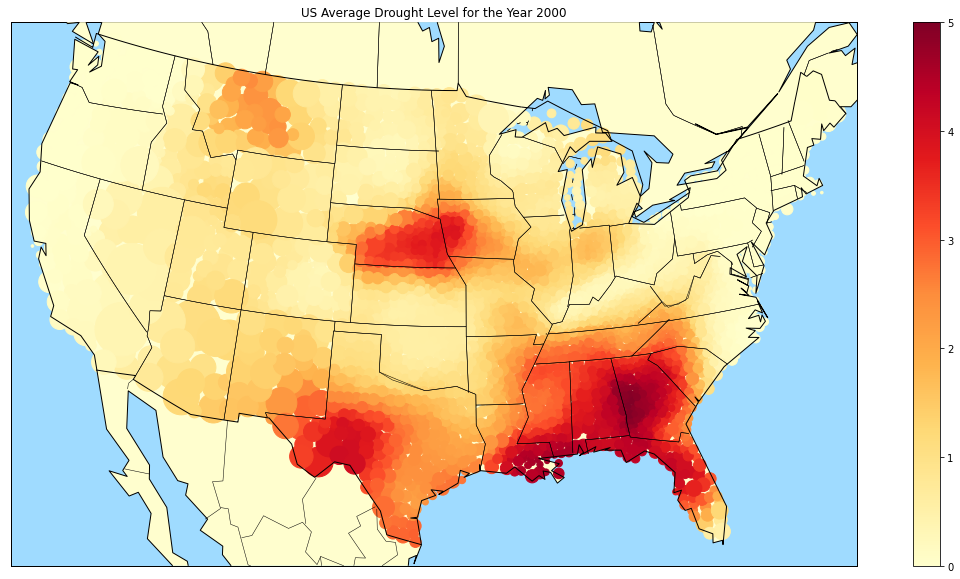

In [18]:
#set initial values before updating
figure=plt.figure(figsize=(20,10))
axes=figure.add_subplot(111)
#using same projection as example map because I liked how it looked like
basemap=Basemap(llcrnrlon=-119,llcrnrlat=22,urcrnrlon=-64,urcrnrlat=49,projection="lcc",lat_1=33,lat_2=45,lon_0=-95)
basemap.drawcoastlines()
basemap.drawmapboundary(zorder=0,fill_color='#9fdbff')
basemap.fillcontinents(color='#FFFECE',zorder=1,lake_color='#9fdbff',alpha=1)
basemap.drawcountries(linewidth=1)
basemap.drawstates()
#Basemap is finished setting up, 
pdf=drought_datay
xloc,yloc=basemap(pdf.nth(0).INTPTLONG.tolist(),pdf.nth(0).INTPTLAT.tolist())
color=pdf.nth(0).Level.tolist()
pointsize=(pdf.nth(0).ALAND_SQMI/7).tolist()
colormap=plt.cm.YlOrRd
scalarmap = ScalarMappable(cmap=colormap)
scatter = axes.scatter(xloc,yloc,s=pointsize,c=color,cmap=colormap,alpha=1,edgecolors='face',marker='o',vmax=5,vmin=0,zorder=1.5)
plt.colorbar(scatter)
plt.title('US Average Drought Level for the Year '+pdf.nth(0).releaseDate.iloc[0].strftime('%Y'))

def update(frame):
    color=pdf.nth(frame).Level.tolist()
    scatter.set_color(scalarmap.to_rgba(color))
    plt.title('US Average Drought Level for the Year '+pdf.nth(frame).releaseDate.iloc[0].strftime('%Y'))
    return scatter
                  
anim=animation.FuncAnimation(figure,func=update,frames=17,interval=1000)
anim.save('Heatmap_animation_US_Drought.gif', writer='imagemagick')

NameError: name 'rc' is not defined

In [14]:
HTML(anim.to_html5_video())
#This function will not have an output, to display the result in jupyter do the following:
#from IPython.display import Image
#Image("img/picture.png")



In [ ]:
test=drought_data()
drought_map(test)